<br>
<hr>

<div style="text-align: justify;">
<br>
<center><div><b style="font-size:21px;">Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria</b></div></center>
<center><div><b style="font-size:22px;color:#72849d">Redes Bayesianas Gaussianas aplicada à predição de vendas em uma grande rede de fast-food brasileira</b></div></center>
<br>
<div style="text-align: justify;">
Resultados apresentados ao Instituto de Ciências Matemáticas e de Computação - ICMC-USP, como parte dos requisitos para obtenção do título de mestre - Mestrado profissional em Matemática, Estatística e Computação Aplicadas à Indústria, sob orientação do <a href="http://conteudo.icmc.usp.br/pessoas/alneu/" target="_blank"> Prof. Dr. Alneu de Andrade Lopes</a> e Co-Orientação <a href="https://scholar.google.com/citations?user=tuOaq-4AAAAJ&hl=pt-BR" target="_blank">Dr. Brett Drury.</a>
</div>
<br>
<hr>
<center><div><b style="font-size:22px;">Previsão de Vendas - Grupo de Bebidas - SP</b></div></center>
<hr>

In [23]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.plotly as ply
import cufflinks as cf
import numpy as np
import pandas as pd
import pyflux as pf
from pyramid.arima import auto_arima
from scipy import stats

plt.style.use('seaborn-whitegrid')

In [24]:
data = pd.read_excel('data/food-sp.xlsx')

In [25]:
data.columns.values

array(['UF', 'DATA', 'VENDA', 'ADICIONAL', 'BRINDE', 'MOLHO FESTIVAL',
       'CHOPP COM UNIDADE EM LITRO', 'BEBIDA COM UNIDADE EM LITRO',
       'BEX SALADAS', 'DOCE E TORTA', 'BEBIDA', 'MOLHO',
       'GELADO E MILK SHAKE', 'ITENS DE COMPOSIÇÃO', 'BEX SNACKS',
       'BEX DOCES', 'BEX SANDUICHES E MOLHOS', 'SACHET MOLHO PINCANHA',
       'BEX GELADOS E MILKSHAKES', 'BEX CAFE', 'PROJETO CAFÉ',
       'PROJETO CHOPP', 'PRATO', 'BEX BEBIDAS', 'LANCHE FRANQUEADO',
       'ACOMPANHAMENTO', 'SANDUICHE', 'LINHA ORIGINAL', 'OUTROS',
       'CALDA BOBS TOP', 'REFEICAO COLABORADORES'], dtype=object)

In [26]:
variavel = 'BEBIDA'

In [27]:
data.index = data['DATA']

In [28]:
df_train = data.iloc[1:84,]
df_test = data.iloc[84:96,] 

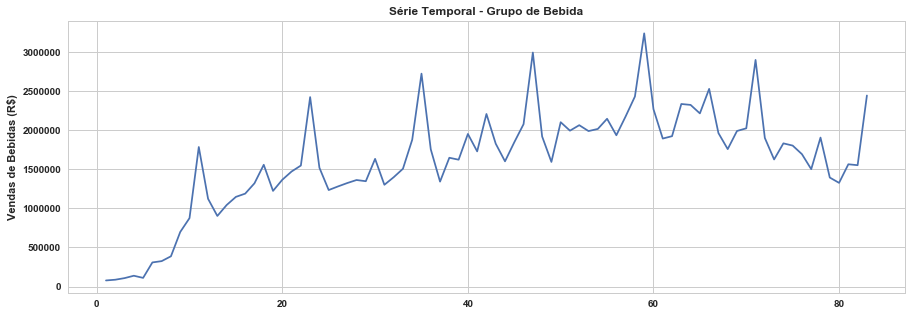

In [15]:
plt.figure(figsize=(15,5))
plt.plot(list(range(1,84)), df_train[variavel])
plt.ylabel('Vendas de Bebidas (R$)', fontweight='bold')
plt.title('Série Temporal - Grupo de '+ variavel.title(),fontweight='bold')
# plt.rc('grid', linestyle="--")
plt.yticks(fontweight='bold')
plt.xticks(fontweight='bold')

plt.savefig('figure.pdf')
plt.show()

In [16]:
df_train[variavel+'_box'], lmbda = stats.boxcox(df_train[variavel])

In [83]:
model = auto_arima(df_train[variavel+'_box'], 
                    n_fits=12,
                    start_p=0, 
                    start_q=0, 
                    max_p=5, 
                    max_q=5, 
                    m=20,
                    start_P=0, 
                    d=1, 
                    D=1, 
                    trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=True)  # set to stepwise

Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 20); AIC=2096.978, BIC=2106.653, Fit time=0.401 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 20); AIC=2113.243, BIC=2120.499, Fit time=0.094 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2092.117, BIC=2104.211, Fit time=0.536 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 2, 20); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2095.494, BIC=2105.169, Fit time=0.462 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 1, 20); AIC=2092.216, BIC=2106.729, Fit

In [84]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   83
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 20)   Log Likelihood               -1037.596
Date:                            Sat, 10 Mar 2018   AIC                           2087.192
Time:                                    23:58:05   BIC                           2101.705
Sample:                                         0   HQIC                          2093.022
                                             - 83                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.534e+05   1.03e+06     -0.344      0.731   -2.37e+06    1.66e+06
ma.L1         -0.7236      0.392     -1.846      0.065      -1.492       0.045
ar.S.L20      -0.7815      1.845     -0.424      0.672      -4.398       2.835
ar.S.L40      -0.4198      1.118     -0.375      0.707      -2.611       1.772
ma.S.L20      -0.1192      2.134     -0.056      0.955      -4.302       4.063
sigma2      3.295e+13      0.010   3.44e+15      0.000     3.3e+13     3.3e+13
===================================================================================
Ljung-Box (Q):                      169.77   Jarque-Bera (JB):                24.87
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             1.26
Prob(H) (two-sided):                  0.40   Kurtosis:                         4.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.79e+31. Standard errors may be unstable.
"""

In [85]:
forecast = model.predict(n_periods=12)
forecast

array([11830333.01769496, 10973727.1202063 , 11960099.47310128,
       14572959.63935975, 10236732.62365581,  8990334.54861628,
       11688508.00988168, 10809152.47022806,  9758515.20890362,
        9185546.96906219, 10733691.17014962, 14633437.72095203])

In [86]:
len(df_test[variavel].values)

12

In [87]:
len(forecast)

12

In [88]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

In [89]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [90]:
y_pred = invboxcox(forecast,lmbda)
y_true = df_test[variavel].values

<h1>Acurácia</h1>

In [91]:
acuracia = round(100 - mean_absolute_percentage_error(y_true , y_pred),0)
acuracia

86.0

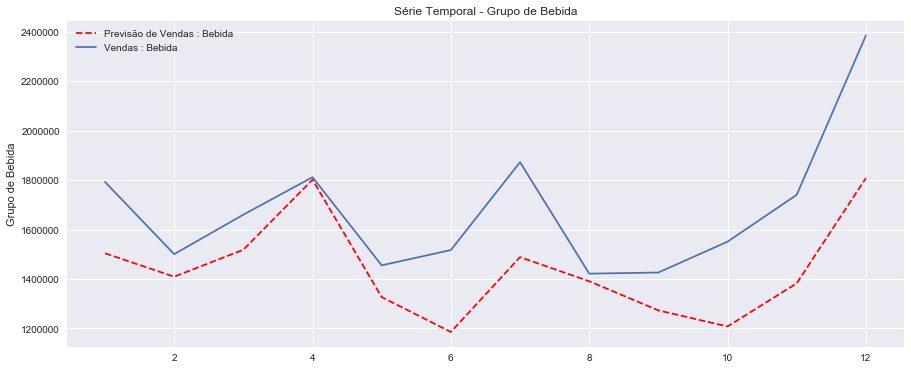

In [92]:
plt.figure(figsize=(15,6))
plt.plot(list(range(1,13)), y_pred, '--', label='Previsão de Vendas : '+ variavel.title() ,color='r')
plt.legend()
plt.plot(list(range(1,13)), y_true, label='Vendas : '+ variavel.title())
plt.legend()
plt.ylabel('Grupo de '+ variavel.title())
plt.title('Série Temporal - Grupo de '+ variavel.title())
plt.show()